<a href="https://colab.research.google.com/github/Eddy1711/aprendizaje-maquina/blob/main/tarea-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

logosCG.png

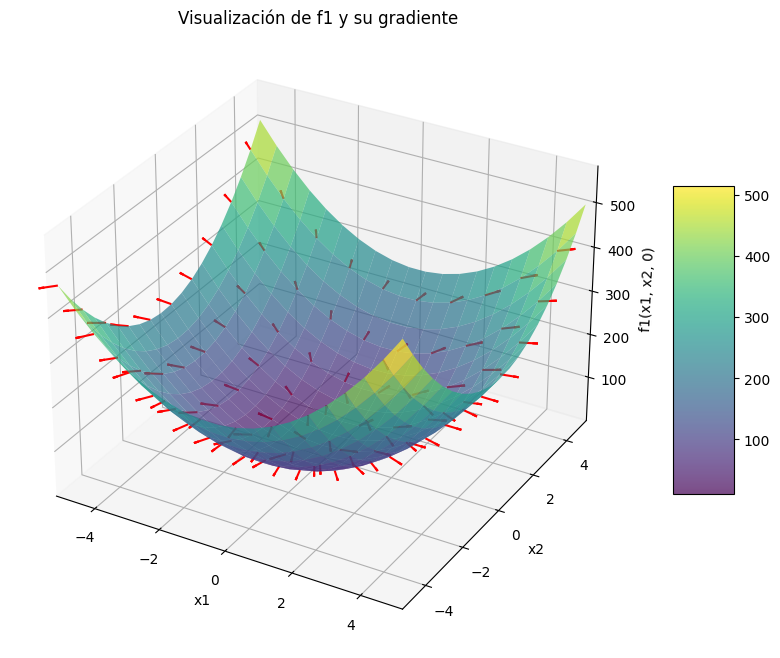

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función cuadrática f1
def f1(x):
    A = np.array([[10, -0.5, -2.5], [-0.5, 10, -5.5], [-2.5, -5.5, -4]])
    a = np.array([5, -2, 6])
    return x.T @ A @ x + a.T @ x + 9

# Definir el gradiente de f1
def grad_f1(x):
    A = np.array([[10, -0.5, -2.5], [-0.5, 10, -5.5], [-2.5, -5.5, -4]])
    a = np.array([5, -2, 6])
    return 2 * A @ x + a

# Crear una cuadrícula de puntos en el espacio
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Calcular los valores de la función en la cuadrícula
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f1(np.array([X[i, j], Y[i, j], 0]))

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Añadir una barra de color para la superficie
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Calcular y dibujar el gradiente en algunos puntos
for i in range(0, X.shape[0], 2):
    for j in range(0, X.shape[1], 2):
        point = np.array([X[i, j], Y[i, j], 0])
        grad = grad_f1(point)
        ax.quiver(point[0], point[1], f1(point), grad[0], grad[1], 0, color='r', length=0.5, normalize=True)

# Ajustar los límites de los ejes
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([np.min(Z), np.max(Z)])

# Configurar etiquetas y mostrar la gráfica
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f1(x1, x2, 0)')
plt.title('Visualización de f1 y su gradiente')
plt.show()
